In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [35]:
# Loading the data from vendor sales summary table
conn=sqlite3.connect('inventory.db')
 # fetch vendor summary data
df=pd.read_sql_query('select * from vendor_sale_summary',conn)

In [36]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [38]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

# Exploratory Data Analysis
- Previously, we examined the various tables in the database to indentify key variables, understand their relationships, and determine which ones should be included in the final analysis.
- In this phase of EDA, we will analyze the resulatant table to gain insights into the distribution of each column, This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with future analysis.

In [39]:
# summary statitics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [5]:
numerical_col

NameError: name 'numerical_col' is not defined

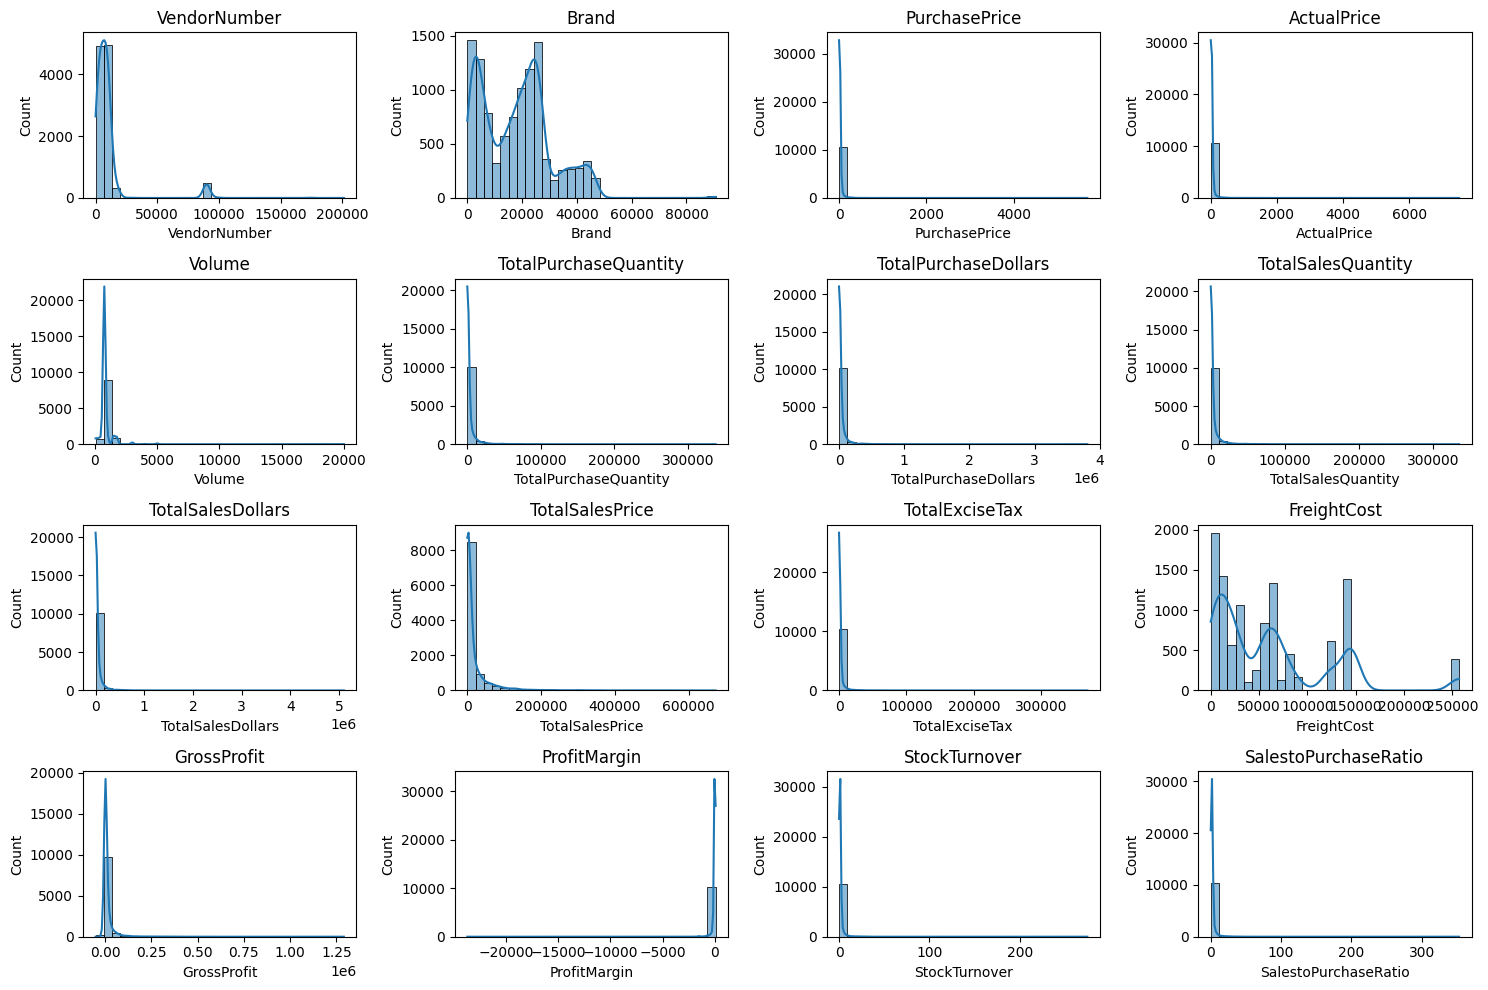

In [40]:
# Distribution Plots For Numerical Column
numerical_col=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_col):
    plt.subplot(4,4,i+1) # Adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.savefig("Numerical_histo.png",bbox_inches="tight")
plt.show()

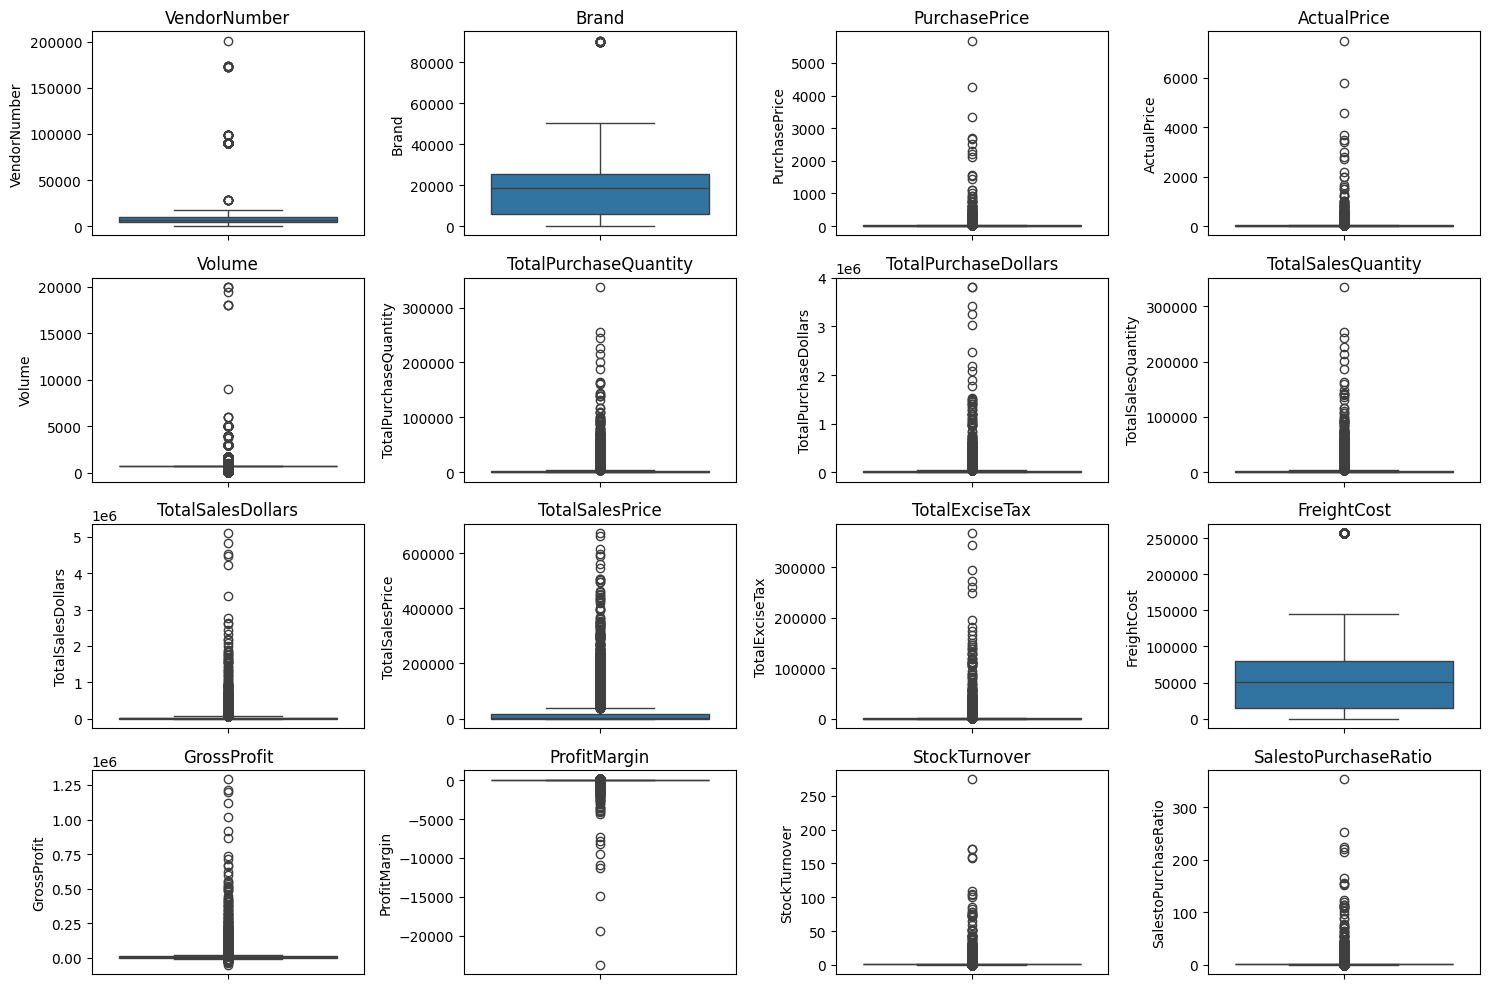

In [41]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_col):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.savefig("Numerical_boxo.png",bbox_inches="tight")
plt.show()

# Summary Statistics Insights:

#### Negative & Zero Values:
- Gross profit: Minimum value is -52,002.78, including losses. Some products or transaction may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
- Profit: Has a minimum of negative infinity, which suggests cases where revenue is zero or even lower than costs.
- Total Sales Quantity & sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

#### Outlier Indicated by High Standrad Deviation:

- Purchase & Actual Price:The max values(5,681.81 & 77499.99) are sighnificantly higher than the mean(24.39 & 35.64),indicating potential premium products.
- Freight Cost: Huge variation from 0.09 to 257,032.007, suggests logistics inefficiencies or bulk shipments.
- Stock Turnover: Range from 0 to 24.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.


In [42]:
# Let's filter the data by removing inconsistencies
df=pd.read_sql_query("""select * from vendor_sale_summary where
GrossProfit >= 1 and TotalSalesQuantity > 0 and ProfitMargin >0""",conn)

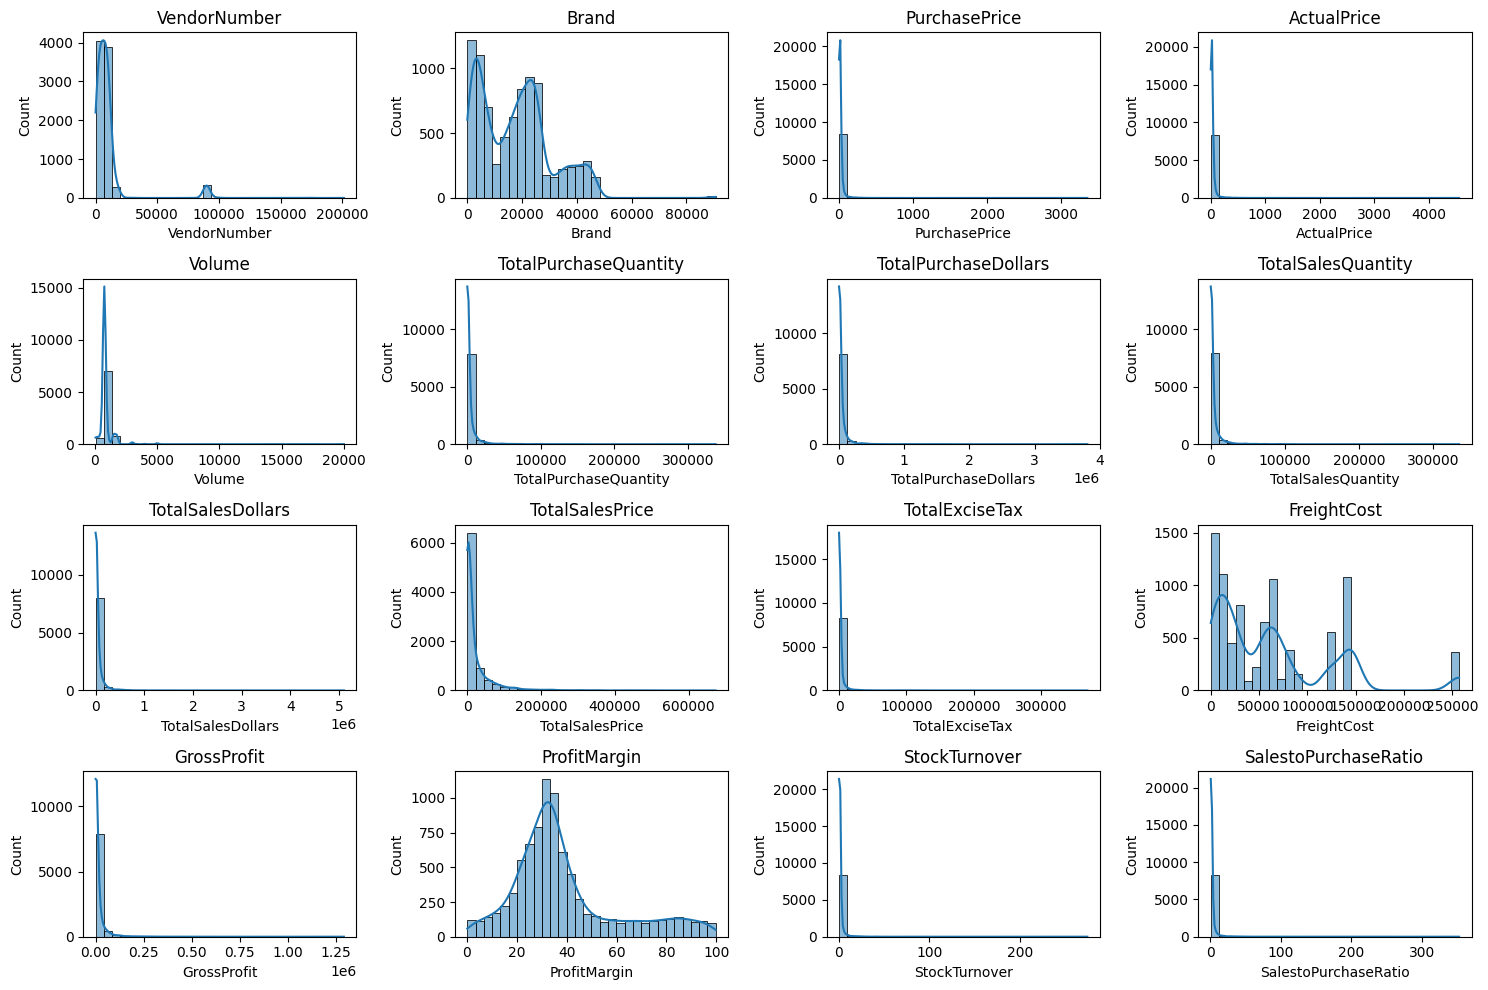

In [43]:
# Distribution Plots For Numerical Column
numerical_col=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_col):
    plt.subplot(4,4,i+1) # Adjust grid layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.savefig("Numerical_histo.png",bbox_inches="tight")
plt.show()

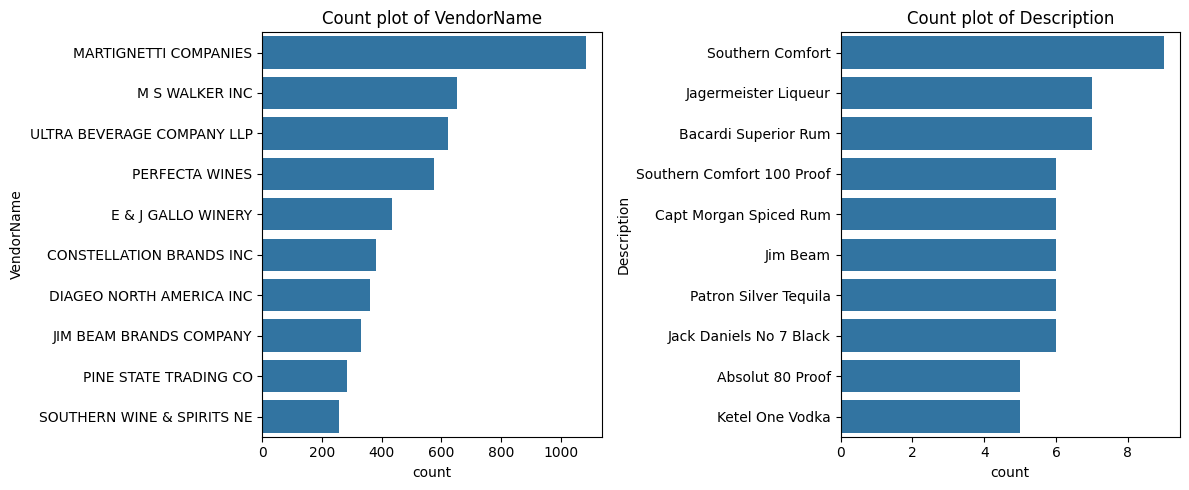

In [44]:
# Count Plots for Categorical Columns
categorical_cols=["VendorName","Description"]
plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10]) # top 10 Categories
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.savefig("Categorical Column.png")
plt.show()

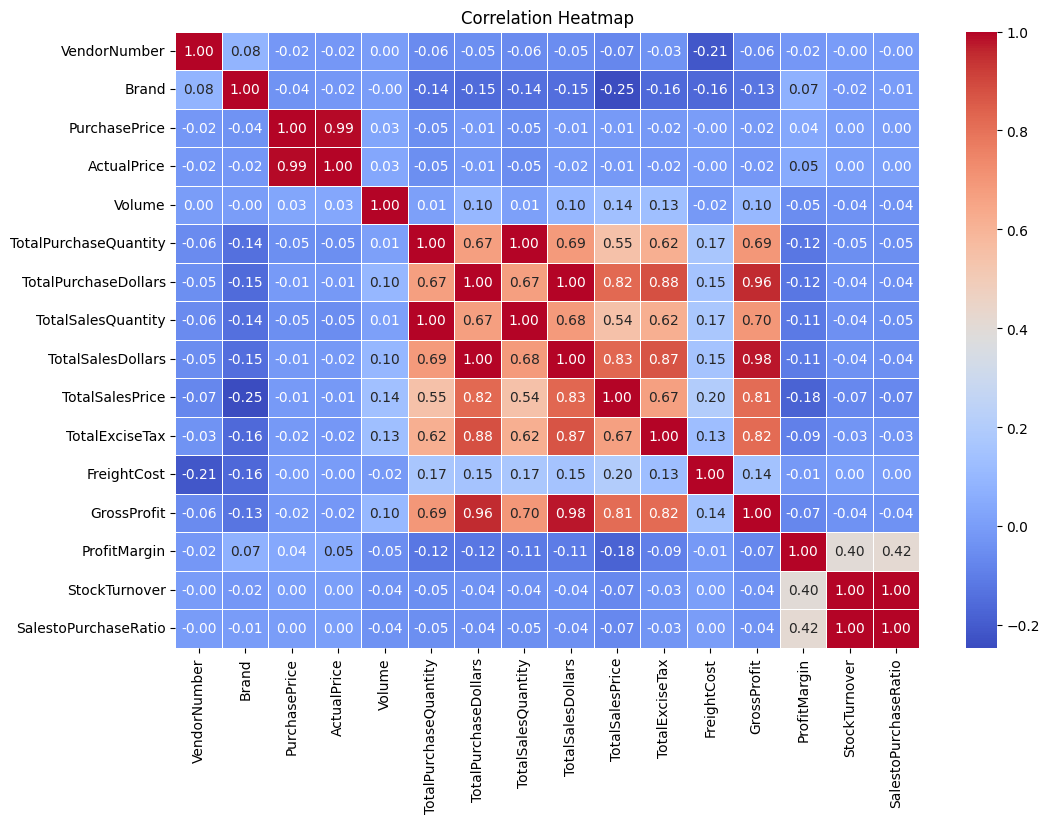

In [45]:
# Corelation Heatmap
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_col].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidth=0.5)
plt.title("Correlation Heatmap")
plt.savefig("Heatmap.png")
plt.show()

## Correlation Insights
- PurchaePrice has weak correaltion with TotalSalesDollars(-0.012) and Grossprofit (-0.016), suggesting that price variation do not significant impact sales revenue or profit.
- Strong corrleation between total purchase quantity and total sale quantity (0.999), confirming efficient inventory turnover.
- Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increses, margin decrease, possibly due to competitive pricing pressures.
- StockTurnOver has weak negative correaltion with both GrossProfit (-0.038) and ProfitMargin(-0.055), indicating that faster turnover does not necessarily result in higher profitability.

# Data Analysis
##### Identify Brands that need promotional or Pricing Adjustment which exhibit lower sales performance but higher profit margins.

In [46]:
 brand_performance=df.groupby('Description').agg({
     'TotalSalesDollars':'sum',
     'ProfitMargin':'mean'
 }).reset_index()

In [47]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)

In [48]:
low_sales_threshold

np.float64(562.0179999999999)

In [49]:
high_margin_threshold

np.float64(65.01655422562766)

In [50]:
# Filter brands with low sales but high profit margins
target_brands=brand_performance[(brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin']>=high_margin_threshold)]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6195,Santa Rita Organic Svgn Bl,9.99,66.466466
2368,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2187,Crown Royal Apple,27.86,89.806174
6233,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
2270,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6241,Sbragia Home Ranch Merlot,549.75,66.444748
3323,Goulee Cos d'Estournel 10,558.87,69.434752


In [51]:
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<10000] # for better visulation

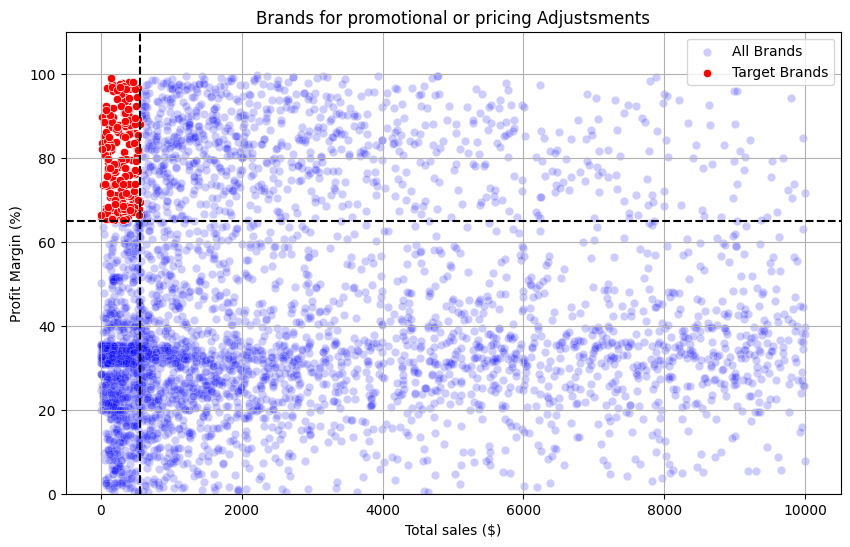

In [52]:
# Create Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars',y='ProfitMargin',color='blue',label='All Brands',alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='ProfitMargin',color='red',label='Target Brands')

plt.axhline(high_margin_threshold,linestyle='--',color='black',label='High Margin Threshold')
plt.axvline(low_sales_threshold,linestyle='--',color='black',label='Low Sales Threshold')

plt.xlabel("Total sales ($)")
plt.ylabel("Profit Margin (%)")

plt.ylim(0, 110)                 # Limit y-axis from 0 to 100
plt.yticks(range(0, 101, 20))   # Set grid lines/ticks every 10 units on y-axis



plt.title("Brands for promotional or pricing Adjustsments")
#plt.legend()
plt.grid(True)
plt.savefig("Scatterplot.png")
plt.show()

#### which Vendors and brands demostrate the highest sales performance?

In [53]:
# Top 10 Vendors and brands by sales performance
top_vendors=df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands=df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

In [54]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [55]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330215.60
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399323.82
BROWN-FORMAN CORP             18246996.78
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706338.59
Name: TotalSalesDollars, dtype: float64

In [56]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value /1_000_000:.2f}M"
    elif value >=1_000:
        return f"{value/1_000:.2f}K"
    else:
        return int(value)
        

In [57]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

In [58]:
top_vendors.apply(lambda x:format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object

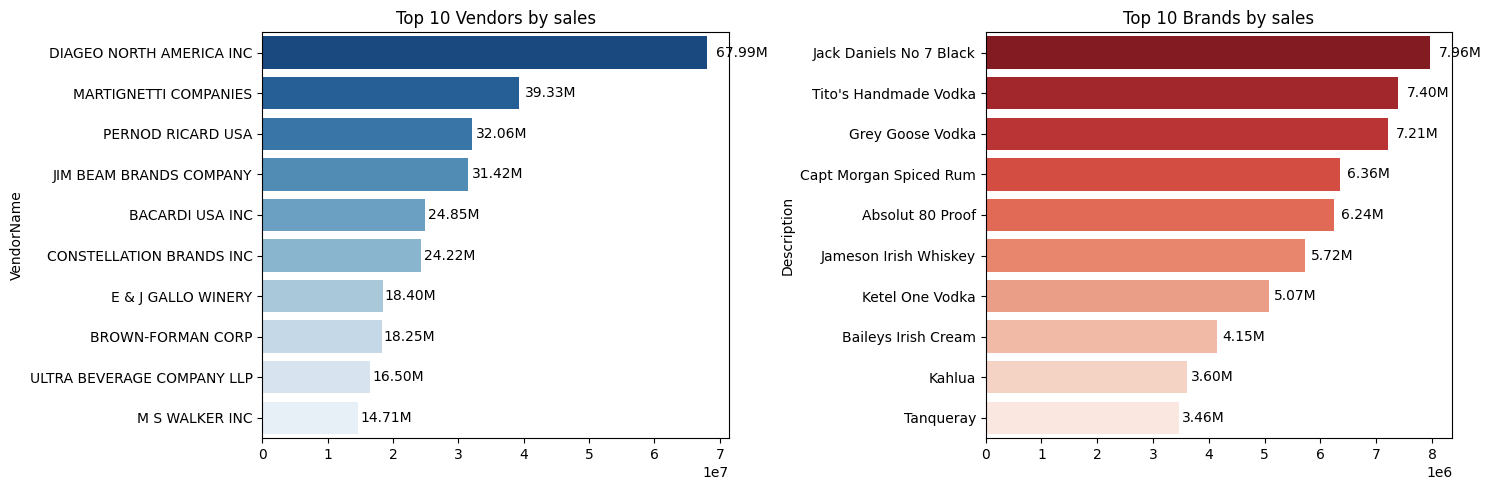

In [59]:
plt.figure(figsize=(15,5))
# plot for Vendor
plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index, x=top_vendors.values,palette="Blues_r")
plt.title("Top 10 Vendors by sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width()+(bar.get_width()*0.02),
    bar.get_y() + bar.get_height()/2,
    format_dollars(bar.get_width()),
    ha='left', va='center', fontsize=10,color='black')

#plot for brands
plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands.index, x=top_brands.values,palette="Reds_r")
plt.title("Top 10 Brands by sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width()+(bar.get_width()*0.02),
    bar.get_y() + bar.get_height()/2,
    format_dollars(bar.get_width()),
    ha='left', va='center', fontsize=10,color='black')

plt.tight_layout()
plt.savefig("Barplottop10vendorandbrand.png")
plt.show()

#### Which vendors contribute the most to total purchase dollars?

In [60]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalSalesDollars':'sum',
    'GrossProfit':'sum',
    'TotalPurchaseDollars':'sum'
}).reset_index()

In [61]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()

In [62]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%', ascending=False),2)

In [63]:
top_performar_v=vendor_performance.head(10)

In [64]:
top_performar_v['TotalSalesDollars']=top_performar_v['TotalSalesDollars'].apply(format_dollars)
top_performar_v['TotalPurchaseDollars']=top_performar_v['TotalPurchaseDollars'].apply(format_dollars)
top_performar_v['GrossProfit']=top_performar_v['GrossProfit'].apply(format_dollars)

In [65]:
top_performar_v

,VendorName,TotalSalesDollars,GrossProfit,TotalPurchaseDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,67.99M,17.89M,50.10M,0.16
57,MARTIGNETTI COMPANIES,39.33M,13.83M,25.50M,0.08
68,PERNOD RICARD USA,32.06M,8.21M,23.85M,0.08
46,JIM BEAM BRANDS COMPANY,31.42M,7.93M,23.49M,0.08
6,BACARDI USA INC,24.85M,7.42M,17.43M,0.06
20,CONSTELLATION BRANDS INC,24.22M,8.95M,15.27M,0.05
11,BROWN-FORMAN CORP,18.25M,5.01M,13.24M,0.04
30,E & J GALLO WINERY,18.40M,6.33M,12.07M,0.04
106,ULTRA BEVERAGE COMPANY LLP,16.50M,5.34M,11.17M,0.04
53,M S WALKER INC,14.71M,4.94M,9.76M,0.03


In [66]:
top_performar_v['PurchaseContribution%'].sum()

np.float64(0.6600000000000001)

In [67]:
top_performar_v['PurchaseContribution%']=top_performar_v['PurchaseContribution%']*100

In [68]:
top_performar_v['Cumulative_contribution%']=top_performar_v['PurchaseContribution%'].cumsum()*100

In [69]:
top_performar_v

,VendorName,TotalSalesDollars,GrossProfit,TotalPurchaseDollars,PurchaseContribution%,Cumulative_contribution%
25,DIAGEO NORTH AMERICA INC,67.99M,17.89M,50.10M,16.0,1600.0
57,MARTIGNETTI COMPANIES,39.33M,13.83M,25.50M,8.0,2400.0
68,PERNOD RICARD USA,32.06M,8.21M,23.85M,8.0,3200.0
46,JIM BEAM BRANDS COMPANY,31.42M,7.93M,23.49M,8.0,4000.0
6,BACARDI USA INC,24.85M,7.42M,17.43M,6.0,4600.0
20,CONSTELLATION BRANDS INC,24.22M,8.95M,15.27M,5.0,5100.0
11,BROWN-FORMAN CORP,18.25M,5.01M,13.24M,4.0,5500.0
30,E & J GALLO WINERY,18.40M,6.33M,12.07M,4.0,5900.0
106,ULTRA BEVERAGE COMPANY LLP,16.50M,5.34M,11.17M,4.0,6300.0
53,M S WALKER INC,14.71M,4.94M,9.76M,3.0,6600.0


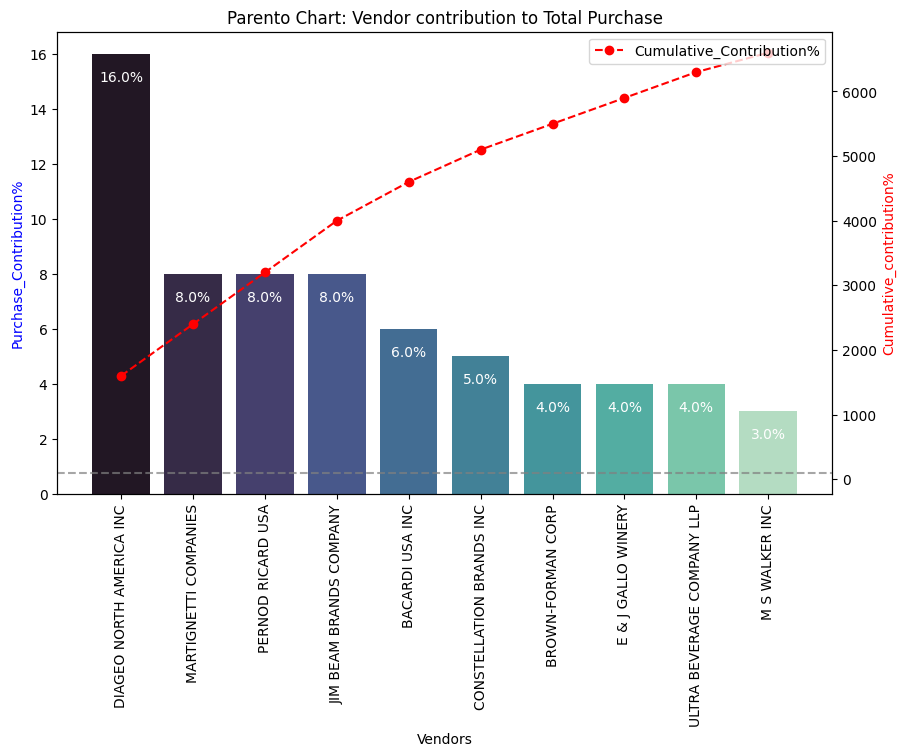

In [70]:
fig, ax1=plt.subplots(figsize=(10,6))

# Bar plot for purchase Contribution%
sns.barplot(x=top_performar_v['VendorName'],y=top_performar_v['PurchaseContribution%'],palette='mako',ax=ax1)
for i,value in enumerate(top_performar_v['PurchaseContribution%']):
    ax1.text(i,value-1,str(value)+'%',ha ='center',fontsize=10,color='white')

# Line Plot for Cumulative Contribution%
ax2=ax1.twinx()
ax2.plot(top_performar_v['VendorName'],top_performar_v['Cumulative_contribution%'],color='red',marker='o',linestyle='dashed',label='Cumulative_Contribution%')
ax1.set_xticklabels(top_performar_v['VendorName'],rotation=90)
ax1.set_ylabel('Purchase_Contribution%',color='blue')
ax2.set_ylabel('Cumulative_contribution%',color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Parento Chart: Vendor contribution to Total Purchase')
ax2.axhline(y=100,color='grey',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')
plt.savefig("ParentoCHart.png")
plt.show()

####  How much total procurement is dependent on the top vendors?

In [71]:
print(f"Total Purchase Contribution of top 10 Vendor is {round(top_performar_v['PurchaseContribution%'].sum(),2)}")

Total Purchase Contribution of top 10 Vendor is 66.0


In [72]:
vendors=list(top_performar_v['VendorName'].values)
vendors

['DIAGEO NORTH AMERICA INC',
 'MARTIGNETTI COMPANIES',
 'PERNOD RICARD USA',
 'JIM BEAM BRANDS COMPANY',
 'BACARDI USA INC',
 'CONSTELLATION BRANDS INC',
 'BROWN-FORMAN CORP',
 'E & J GALLO WINERY',
 'ULTRA BEVERAGE COMPANY LLP',
 'M S WALKER INC']

In [73]:
purchase_contribution=list(top_performar_v['PurchaseContribution%'].values)
purchase_contribution

[np.float64(16.0),
 np.float64(8.0),
 np.float64(8.0),
 np.float64(8.0),
 np.float64(6.0),
 np.float64(5.0),
 np.float64(4.0),
 np.float64(4.0),
 np.float64(4.0),
 np.float64(3.0)]

In [74]:
total_contribution=sum(purchase_contribution)
remaning_contribution=100-total_contribution

In [75]:
print(total_contribution)
print(remaning_contribution)

66.0
34.0


In [76]:
# Append "Other Vendors" Category
vendors.append("Other Vendors")
purchase_contribution.append(remaning_contribution)

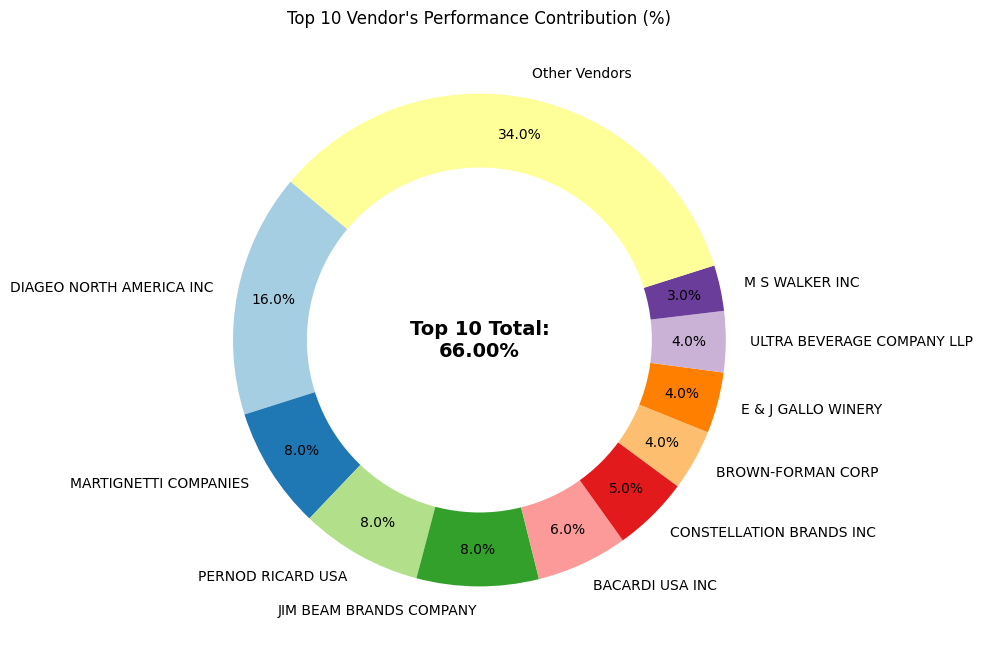

In [77]:
#Dount Chart
fig,ax=plt.subplots(figsize=(8,8))
wedges,texts,autotexts=ax.pie(purchase_contribution,labels=vendors,autopct='%1.1f%%',startangle=140,
                             pctdistance=0.85,colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "Dount" effect
center_circle=plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)

# add Total Contribution annotation in the center:
plt.text(0,0,f"Top 10 Total:\n{total_contribution:.2f}%",fontsize=14,fontweight='bold',ha='center',va='center')

plt.title("Top 10 Vendor's Performance Contribution (%)")
plt.savefig("Donut top 10 vendor")
plt.show()

#### Does Purchaseing in bulk reduce the unit price, and what is the optimal purchase volumne for cost savings?

In [78]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [79]:
df['OrderSize']=pd.qcut(df["TotalPurchaseQuantity"],q=3,labels=["small","Medium","Large"])

In [80]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8551,small,2
8552,small,2
8553,small,6
8554,small,1


In [81]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
small,39.113049
Medium,15.477780
Large,10.780039


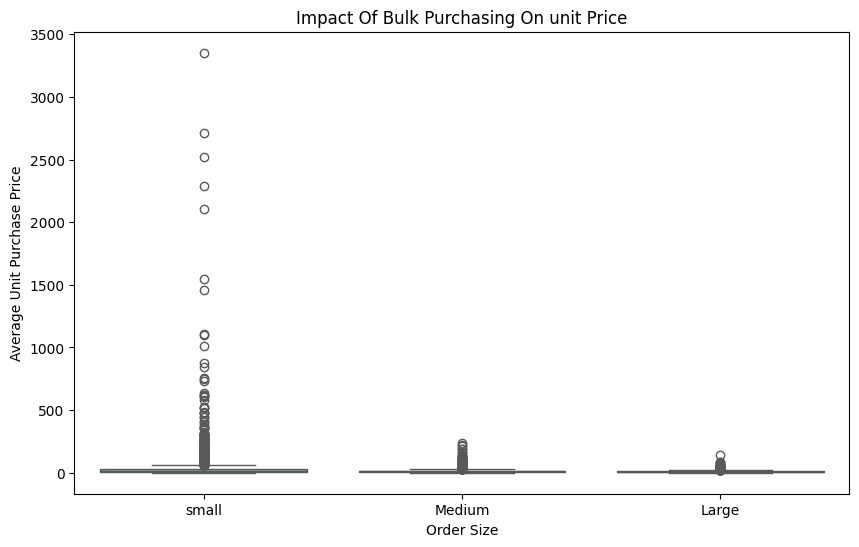

In [82]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="OrderSize",y="UnitPurchasePrice",palette="Set2")
plt.title("Impact Of Bulk Purchasing On unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()
 

- Vendors Buying in bulk (Large Order Size) get the lowest unit price ($ 10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price Different between Small and large orders is substatial (-72% reduction in unit cost).
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall salses loweer per unit revenue.

 #### Which Vendors have low inventory turnover, indicationg excess stock and slow-moving Products?

In [83]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


#### How much capital is locked in unsold inventory per vendor,a nd which vendors contributes the most to it

In [84]:
df['UnsoldInventoryValue']=(df["TotalPurchaseQuantity"]-df["TotalSalesQuantity"])*df["PurchasePrice"]

In [85]:
print('Total Unsold Capital',format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital 2.71M


In [86]:
# Aggeregate Capital Locked per Vendor
inventory_value_per_vendor=df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

# Sort Vendors with Highest Locked Capital
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue",ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"]=inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.14K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.67K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


#### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors

In [87]:
top_threshold=df['TotalSalesDollars'].quantile(0.75)
low_threshold=df['TotalSalesDollars'].quantile(0.25)
print(top_threshold,low_threshold)

40656.1125 1359.83


In [88]:
top_vendor=df[df["TotalSalesDollars"]>=top_threshold]["ProfitMargin"].dropna()
low_vendor=df[df["TotalSalesDollars"]<=low_threshold]["ProfitMargin"].dropna()

In [89]:
top_vendor

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3418    75.867661
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
Name: ProfitMargin, Length: 2139, dtype: float64

In [90]:
def confidence_interval(data,confidence=0.95):
    mean_val=np.mean(data)
    std_err=np.std(data,ddof=1)/np.sqrt(len(data)) # standard error
    t_critical = stats.t.ppf((1 + confidence)/2, df=len(data)-1)
    margin_of_error=t_critical*std_err
    return mean_val,mean_val-margin_of_error,mean_val+margin_of_error

Top Vendors 95% CI: (30.71,31.57), Mean: 31.14
Low Vendors 95% CI: (40.71,42.85), Mean: 41.78


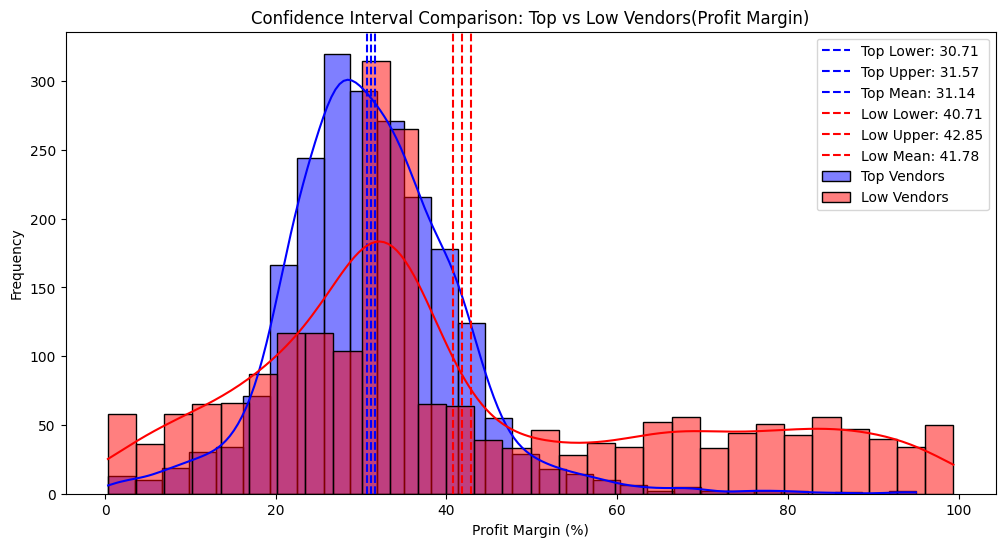

In [91]:
top_mean,top_lower,top_upper=confidence_interval(top_vendor)
low_mean,low_lower,low_upper=confidence_interval(low_vendor)
print(f"Top Vendors 95% CI: ({top_lower:.2f},{top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f},{low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12,6))

# Top Vendor List
sns.histplot(top_vendor,kde=True,color='blue',bins=30,alpha=0.5,label="Top Vendors")
plt.axvline(top_lower,color='blue',linestyle="--",label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper,color='blue',linestyle="--",label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean,color='blue',linestyle="--",label=f"Top Mean: {top_mean:.2f}")

# Low Vendor List
sns.histplot(low_vendor,kde=True,color='red',bins=30,alpha=0.5,label="Low Vendors")
plt.axvline(low_lower,color='red',linestyle="--",label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper,color='red',linestyle="--",label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean,color='red',linestyle="--",label=f"Low Mean: {low_mean:.2f}")

# Finalize plot
plt.title("Confidence Interval Comparison: Top vs Low Vendors(Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()

plt.show()

- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top- performing vendors(30.74% to 31.61%).
- This suggests that vendors with lower sales tends to maintain higher profit margins,potentially due to preminum pricing or lower operational coasts.
- For High-performing vendors: if they aim to improve profitability, they could explore selective price adjustemnts, cost optimization or bunding strategies.
- For Low-performing vendors: despite higher margins, their low sales volume might indicate a need for bettter marketing, competitive pricing, or improved distribution strategies.

In [92]:
print(format_dollars(15458))

15.46K


In [93]:
x=154586452/1_000_000

In [94]:
print(f"{x:.2f}M")

154.59M


In [95]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,...,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large,79624.37
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,...,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large,87913.29
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,...,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large,4870.08
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,...,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large,20535.90
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,...,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large,49712.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8551,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2,2.84,14.0,...,5.97,0.73,257032.07,25.02,89.806174,7.000000,9.809859,1.42,small,-17.04
8552,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,...,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32,small,-3.96
8553,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,...,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39,small,-49.92
8554,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,...,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47,small,-104.37


In [33]:
vendor_performance

,VendorName,TotalSalesDollars,GrossProfit,TotalPurchaseDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,67990099.42,17892873.26,50097226.16,0.16
57,MARTIGNETTI COMPANIES,39330215.60,13828263.41,25501952.19,0.08
68,PERNOD RICARD USA,32063196.19,8212032.02,23851164.17,0.08
46,JIM BEAM BRANDS COMPANY,31423020.46,7928716.14,23494304.32,0.08
6,BACARDI USA INC,24854817.14,7422796.88,17432020.26,0.06
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,327.59,198.95,128.64,0.00
107,UNCORKED,176.94,58.20,118.74,0.00
85,SILVER MOUNTAIN CIDERS,342.51,265.33,77.18,0.00
16,CAPSTONE INTERNATIONAL,246.87,192.23,54.64,0.00


In [96]:
df.to_csv("Final_Dashbord.csv")